In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bank.csv',delimiter = ";")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df.shape

(4521, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [18]:
df = df.rename(columns={'y':'Subscription'})

In [19]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [20]:
from sklearn import preprocessing

In [21]:
label_encoder = preprocessing.LabelEncoder()

In [22]:
df['Subscription'] = label_encoder.fit_transform(df['Subscription'])

In [23]:
df['Subscription'].unique()

array([0, 1], dtype=int64)

In [25]:
df['marital'] = label_encoder.fit_transform(df['marital'])

In [26]:
df['marital'].unique()

array([1, 2, 0])

In [27]:
df['education']=label_encoder.fit_transform(df['education'])

In [28]:
df['education'].unique()

array([0, 1, 2, 3])

In [29]:
df['job']=label_encoder.fit_transform(df['job'])

In [30]:
df['job'].unique()

array([10,  7,  4,  1,  6,  9,  2,  0,  8,  3,  5, 11])

In [31]:
df['loan']=label_encoder.fit_transform(df['loan'])

In [32]:
df['loan'].unique()

array([0, 1])

In [34]:
df['housing']=label_encoder.fit_transform(df['housing'])

In [35]:
df['housing'].unique()

array([0, 1])

In [36]:
df['default']=label_encoder.fit_transform(df['default'])

In [37]:
df['default'].unique()

array([0, 1])

In [38]:
df['contact']=label_encoder.fit_transform(df['contact'])

In [39]:
df['contact'].unique()

array([0, 2, 1])

In [40]:
df['poutcome']=label_encoder.fit_transform(df['poutcome'])

In [41]:
df['poutcome'].unique()

array([3, 0, 1, 2])

In [42]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription
0,30,10,1,0,0,1787,0,0,0,19,oct,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,may,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,apr,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,jun,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,may,226,1,-1,0,3,0


In [43]:
df.drop(['month','day'],axis=1,inplace=True)

In [44]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,Subscription
0,30,10,1,0,0,1787,0,0,0,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,226,1,-1,0,3,0


<Axes: >

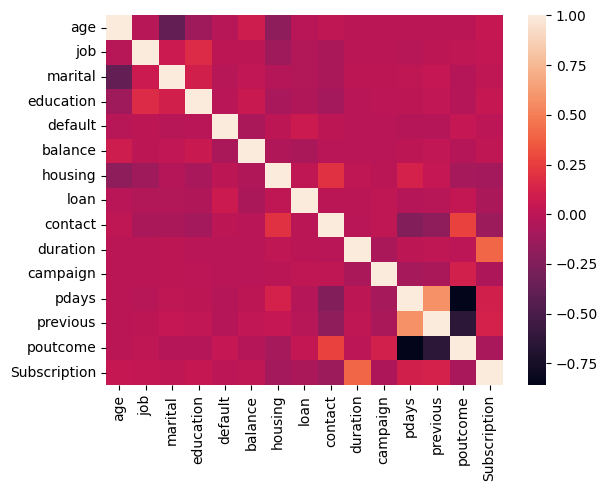

In [45]:
sns.heatmap(df.corr())

In [46]:
x = df.drop(['Subscription'],axis=1).values
y = df['Subscription'].values

In [47]:
x.shape

(4521, 14)

In [48]:
y.shape

(4521,)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [50]:
X_train.shape

(3616, 14)

In [51]:
y_train.shape

(3616,)

In [52]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()

In [53]:
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [54]:
X_test.shape

(905, 14)

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [57]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
dt_pred = dt.predict(X_test)

In [60]:
dt_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [61]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [65]:
print("Training Score: ", round(dt.score(X_train, y_train)*100,2))
print("Testing Score: ",round(dt.score(X_test, y_test)*100,2))

Training Score:  100.0
Testing Score:  87.4


In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
print("Training cross val score: ",round(((cross_val_score(dt, X_train, y_train)).mean())*100,2))
print("Testing cross val score: ",round(((cross_val_score(dt, X_test, y_test)).mean())*100,2))

Training cross val score:  85.43
Testing cross val score:  84.42


In [68]:
accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy:",accuracy)
print("\nClassification Report:\n",classification_report(y_test, dt_pred))
print("\nConfusion Matrix\n", confusion_matrix(y_test, dt_pred))

Accuracy: 0.8740331491712707

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       797
           1       0.47      0.44      0.46       108

    accuracy                           0.87       905
   macro avg       0.70      0.69      0.69       905
weighted avg       0.87      0.87      0.87       905


Confusion Matrix
 [[743  54]
 [ 60  48]]
